<a href="https://colab.research.google.com/github/Apollonius12345/Confidence_evaluator/blob/main/Iris_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import json
import numpy as np
import uuid
from matplotlib import pyplot as plt

In [ ]:
# image_loading
def load_image(x):
    byte_image = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_image)
    return img

In [ ]:
train_images = tf.data.Dataset.list_files('/content/drive/MyDrive/Aries Project/Iris_detection/aug_data/train/images/*.jpg', shuffle = False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (250, 250)))
train_images = train_images.map(lambda x: x/255)

In [ ]:
test_images = tf.data.Dataset.list_files('/content/drive/MyDrive/Aries Project/Iris_detection/aug_data/test/images/*.jpg', shuffle = False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (250, 250)))
test_images = test_images.map(lambda x: x/255)

In [ ]:
val_images = tf.data.Dataset.list_files('/content/drive/MyDrive/Aries Project/Iris_detection/aug_data/val/images/*.jpg', shuffle = False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (250, 250)))
val_images = val_images.map(lambda x: x/255)

In [ ]:
train_images.as_numpy_iterator().next()

array([[[0.46117646, 0.47074512, 0.42290196],
        [0.46541175, 0.4665098 , 0.41505882],
        [0.48000002, 0.47058824, 0.40862745],
        ...,
        [0.10352941, 0.12313725, 0.14666668],
        [0.10211756, 0.12878422, 0.14525482],
        [0.1027451 , 0.12235294, 0.13929419]],

       [[0.4933333 , 0.47921568, 0.4007843 ],
        [0.48000002, 0.46588236, 0.38901964],
        [0.48235294, 0.46039218, 0.38431373],
        ...,
        [0.10352942, 0.11450981, 0.15294118],
        [0.09349021, 0.10211766, 0.14133334],
        [0.1027451 , 0.11372549, 0.147608  ]],

       [[0.49490196, 0.4501961 , 0.3435294 ],
        [0.48156863, 0.4345098 , 0.34039217],
        [0.4627451 , 0.41960785, 0.33333334],
        ...,
        [0.10196079, 0.09803922, 0.16078432],
        [0.1082352 , 0.09647049, 0.17098029],
        [0.12156863, 0.11764706, 0.17568646]],

       ...,

       [[0.6627451 , 0.72313726, 0.73019606],
        [0.6635294 , 0.72156864, 0.73176473],
        [0.6784314 , 0

Label_prep

In [ ]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
    return[label['keypoints']]

In [ ]:
train_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/Aries Project/Iris_detection/aug_data/train/labels/*.json', shuffle = False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.float16]))

In [ ]:
iterator = train_labels.as_numpy_iterator()

In [ ]:
iterator.next()

(array([0.699 , 0.626 , 0.8154, 0.6216], dtype=float16),)

In [ ]:
test_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/Aries Project/Iris_detection/aug_data/test/labels/*.json', shuffle = False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.float16]))

In [ ]:
val_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/Aries Project/Iris_detection/aug_data/val/labels/*.json', shuffle = False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.float16]))

In [ ]:
val_labels.as_numpy_iterator().next()

(array([0.5806, 0.377 , 0.464 , 0.368 ], dtype=float16),)

In [ ]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(5040, 5050, 1079, 1080, 1080, 1080)

In [ ]:
# Combining labels and images
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(8000)
train = train.batch(16)
train = train.prefetch(4)
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(2000)
test = test.batch(16)
test = test.prefetch(4)
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(2000)
val = val.batch(16)
val = val.prefetch(4)

In [ ]:
train.as_numpy_iterator().next()[1]

(array([[0.525 , 0.458 , 0.6025, 0.4214],
        [0.623 , 0.4639, 0.7305, 0.4775],
        [0.3914, 0.4321, 0.2854, 0.453 ],
        [0.325 , 0.62  , 0.4287, 0.62  ],
        [0.581 , 0.598 , 0.4866, 0.5894],
        [0.656 , 0.4456, 0.7505, 0.481 ],
        [0.    , 0.    , 0.529 , 0.607 ],
        [0.5127, 0.6123, 0.612 , 0.5986],
        [0.7563, 0.5776, 0.857 , 0.5435],
        [0.2054, 0.6455, 0.0892, 0.626 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.709 , 0.4055, 0.8037, 0.441 ],
        [0.418 , 0.534 , 0.312 , 0.5137],
        [0.3303, 0.567 , 0.2188, 0.5557],
        [0.434 , 0.637 , 0.3179, 0.6323],
        [0.3762, 0.389 , 0.48  , 0.389 ]], dtype=float16),)

IndexError: ignored

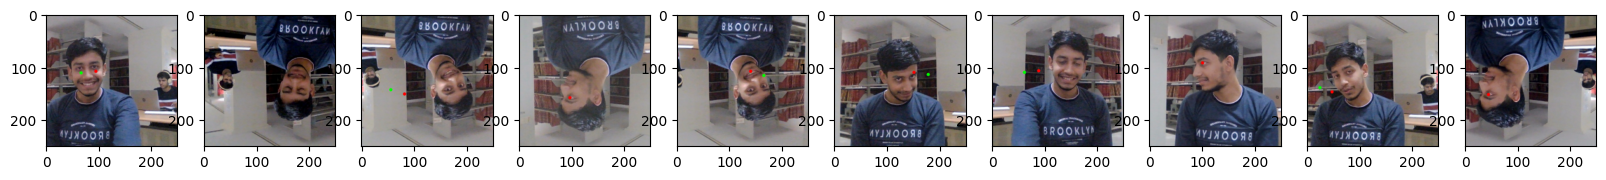

In [ ]:
# Viewing samples
data_samples = train.as_numpy_iterator()
res = data_samples.next()
fig, ax = plt.subplots(ncols = 10, figsize = (20, 20))
for idx in range(16):
    sample_image = res[0][idx]
    sample_coords = res[1][0][idx]
    
    # Red circle is left eye
    # Blue circle is R eye
    cv2.circle(sample_image, tuple(np.multiply(sample_coords[:2], [250,250]).astype(int)), 3, (255,0,0), -1)
    cv2.circle(sample_image, tuple(np.multiply(sample_coords[2:], [250,250]).astype(int)), 3, (0,255,0), -1)
    
    ax[idx].imshow(sample_image)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Reshape, Dropout
from tensorflow.keras.applications import ResNet152V2

In [ ]:
# Building the model

model = Sequential([
    Input(shape = (250, 250, 3)),
    ResNet152V2(include_top = False, input_shape = (250, 250, 3)),
    Conv2D(512, 3, padding = 'same', activation = 'relu'),
    Conv2D(512, 3, padding = 'same', activation = 'relu'),
    Conv2D(256, 3, 2, padding = 'same', activation = 'relu'),
    Conv2D(256, 2, 2, activation = 'ReLU'),
    Dropout(0.05),
    Conv2D(4,2,2),
    Reshape((4,))
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001, weight_decay = 0.0007)
loss = tf.keras.losses.MeanSquaredError()

In [ ]:
model.compile(optimizer,loss)

In [ ]:
X, y = train.as_numpy_iterator().next()

In [ ]:
X.shape

(16, 250, 250, 3)

In [ ]:
coordinates = model.predict(X)
coordinates

1/1 [==============================] - 9s 9s/step


array([[ 0.574924  ,  0.33016333,  1.216152  ,  0.58415353],
       [-0.1080052 , -0.5618564 ,  0.7644368 ,  0.8770545 ],
       [-0.7488236 ,  0.26008612,  0.58182496,  0.72127086],
       [-0.31504944,  0.4232176 ,  0.414676  ,  0.40242648],
       [-0.10150208, -0.7857675 ,  0.7337048 ,  1.1917357 ],
       [ 0.22452003, -0.21474184,  1.1980369 ,  1.0350945 ],
       [ 0.8468077 ,  0.6735124 ,  1.4413885 ,  0.29429573],
       [ 0.20795916,  0.0057117 ,  1.4058911 , -0.01341692],
       [ 0.29017746,  0.15084419,  1.7535834 , -0.5707085 ],
       [ 1.3085417 , -0.14093125,  0.8755625 , -0.15874922],
       [ 0.406728  ,  0.10400534,  1.4652212 , -0.03574884],
       [-0.12911892, -0.00820176,  0.26969963, -0.44930184],
       [-0.13606367, -0.310374  ,  0.5813824 ,  1.030292  ],
       [-0.13896877, -0.9052043 ,  0.4797352 ,  0.5967808 ],
       [-0.36055726, -1.0376494 ,  0.7740583 , -0.05574375],
       [-0.15504602,  0.05161649,  0.51503164,  0.08830163]],
      dtype=float32)

In [ ]:
# Model_training
hist = model.fit(train, epochs = 5, validation_data = val)
# Actual number of epochs is 100

NameError: ignored

In [ ]:
# Reviewing the performance
hist.history
# Plotting the losses and evaluating the model
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
plt.suptitle('Loss_plot Training v/s Val')
plt.legend()
plt.show()

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
test_sample = test_data.next()

In [ ]:
yhat = model.predict((test_sample[0]))

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[idx]
# Red circle is left eye
# Blue circle is R eye
    cv2.circle(sample_image, tuple(np.multiply(sample_coords[:2], [250,250]).astype(int)), 2, (255,0,0), -1)
    cv2.circle(sample_image, tuple(np.multiply(sample_coords[2:], [250,250]).astype(int)), 2, (0,255,0), -1)
    
ax[idx].imshow(sample_image)

In [ ]:
# Saving the model
from tensorflow.keras.models import load_model
model.save('iris_detection_model_100_epoch')
model = load_model('iris_detection_model_100_epoch')

In [ ]:
# predicting again with the same model after reloading
model.predict(test_sample[0])

In [ ]:
# Real time detection 
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _, frame = cap.read()
    
    frame = frame[50:500, 50:500, :]
    rgb_img = cv2.cvtcolor(frame, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(rgb_img, (250, 250))
    
    yhat = model.predict(np.expand_dims(resized/255, 0))
    sample_coords = yhat[0,:4]
    
    cv2.circle(frame, tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)), 2, (255,0,0), -1)
    cv2.circle(frame, tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 2, (0,255,0), -1)
    
    cv2.imshow('Eye_track', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()